# This shows distribution of feature and noise barcodes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("class_600_0.35_(600,500,450,400,350,300,250,200,100).csv")
print(df.head())
print("Size of the input file:",len(df))
#plt.scatter(df.diff,df.feature,marker="+",color="red")

   gamma(0.35)     Birth     Death      diff  feature
0        600.0  0.394824  0.394834  0.000010        0
1          NaN  0.402790  0.403070  0.000280        0
2          NaN  0.379369  0.379874  0.000505        0
3          NaN  0.163303  0.164628  0.001325        0
4          NaN  0.250282  0.255931  0.005649        0
Size of the input file: 114


# Train-test split with cross validation and accuracy score

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df[['diff']],df.feature, test_size=0.2, random_state=1)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

print("The size of test set",len(X_test))
print("The ouput of  test set",y_test)
print("The ouput of  pred set",y_pred)
print("The performance score of the model is", score)

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The size of test set 23
The ouput of  test set 93     1
44     0
56     1
82     1
69     1
105    1
101    0
58     0
35     0
38     0
65     0
94     0
2      0
102    0
112    1
53     0
100    0
97     0
92     1
42     1
74     0
17     0
78     0
Name: feature, dtype: int64
The ouput of  pred set [1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
The performance score of the model is 0.8695652173913043


In [3]:
#### crosss validation

from sklearn.model_selection import KFold
import sklearn


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_scores = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(linear_scores)
print('Average cross-validation score: {:.4f}'.format(linear_scores.mean()))

[0.89473684 0.83333333 0.72222222 0.83333333 0.83333333]
Average cross-validation score: 0.8234


Text(0.5, 384.16, 'Predicted label')

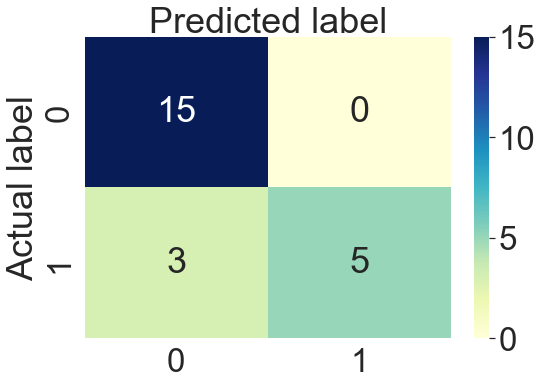

In [12]:
### Confusion Matrix

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})     ##### Figure size

sns.set(font_scale=3)                          #### font size

class_names=[1,0] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
#plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

### viridis,YlGnBu,inferno,cividis,winter

ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#plt.savefig('cnf_mat_duff.png', bbox_inches='tight',dpi=300)
#plt.savefig('cnf_mat_duff.eps', bbox_inches='tight',dpi=300)



In [4]:
from sklearn.metrics import classification_report
target_names = ['Features (1)','Noise (0)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Features (1)       0.83      1.00      0.91        15
   Noise (0)       1.00      0.62      0.77         8

    accuracy                           0.87        23
   macro avg       0.92      0.81      0.84        23
weighted avg       0.89      0.87      0.86        23



# This code sequentially takes barcodes extracted from newer parameters and classifies noise count - feature count by the trained ML classifier 

In [7]:
############ 600

Scr = []
Noise_score = []


gamma = np.arange(0.35,0.41,0.001)



for i in range(len(gamma)):
    
    lan = gamma[i]
    print("600 Landmarks of gamma:",lan)
    df1 = pd.read_csv(f"test data_new parameter range\\ripser_plot_gamma={gamma[i]}_600(diff).csv")             
    xtest1 = df1[['diff']]
    test1 = model.predict(xtest1)
    print("Number of barcodes:",len(xtest1))
    print(f"The output of test set_{lan}:",test1)
 #   C:\Users\ASUS\Downloads\Persistent Homology (PH) for systems\DUFFING[persistence homology]\Final paper work_duff\600\600_classifier
#----------------------------------------------------------------------------------------------------------------    
    Noise = 0
    feature = 0
#    print(len(test1))

    for i in range(len(test1)):
        if test1[i] == 0:
            Noise = Noise + 1
        else:
            feature = feature + 1
    print("No of noise:",Noise)
    print("No of features:",feature)
#-----------------------------------------------------------------------------------------------------------------
    Score = Noise/(feature + 1)
    
    Scr.append(Score)
    
    
    Noise_score.append(Noise)
    
    print("Score:",Score)
    
    print()

print("Noise score:",Noise_score)    
    

    
print("The score array:",Scr)
print("score length:",len(Scr))

600 Landmarks of gamma: 0.35
Number of barcodes: 14
The output of test set_0.35: [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
No of noise: 13
No of features: 1
Score: 6.5

600 Landmarks of gamma: 0.351
Number of barcodes: 14
The output of test set_0.351: [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
No of noise: 13
No of features: 1
Score: 6.5

600 Landmarks of gamma: 0.352
Number of barcodes: 11
The output of test set_0.352: [0 0 0 0 0 0 0 0 0 0 1]
No of noise: 10
No of features: 1
Score: 5.0

600 Landmarks of gamma: 0.353
Number of barcodes: 13
The output of test set_0.353: [0 0 0 0 0 0 0 0 0 0 0 0 1]
No of noise: 12
No of features: 1
Score: 6.0

600 Landmarks of gamma: 0.354
Number of barcodes: 11
The output of test set_0.354: [0 0 0 0 0 0 0 0 0 0 1]
No of noise: 10
No of features: 1
Score: 5.0

600 Landmarks of gamma: 0.355
Number of barcodes: 9
The output of test set_0.355: [0 0 0 0 0 0 0 0 1]
No of noise: 8
No of features: 1
Score: 4.0

600 Landmarks of gamma: 0.356
Number of barcodes: 11
The output of test se

Number of barcodes: 95
The output of test set_0.4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No of noise: 95
No of features: 0
Score: 95.0

600 Landmarks of gamma: 0.401
Number of barcodes: 79
The output of test set_0.401: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1]
No of noise: 78
No of features: 1
Score: 39.0

600 Landmarks of gamma: 0.402
Number of barcodes: 69
The output of test set_0.402: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No of noise: 69
No of features: 0
Score: 69.0

600 Landmarks of gamma: 0.403
Number of barcodes: 92
The output of test set_0.403: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

<Figure size 1440x720 with 0 Axes>

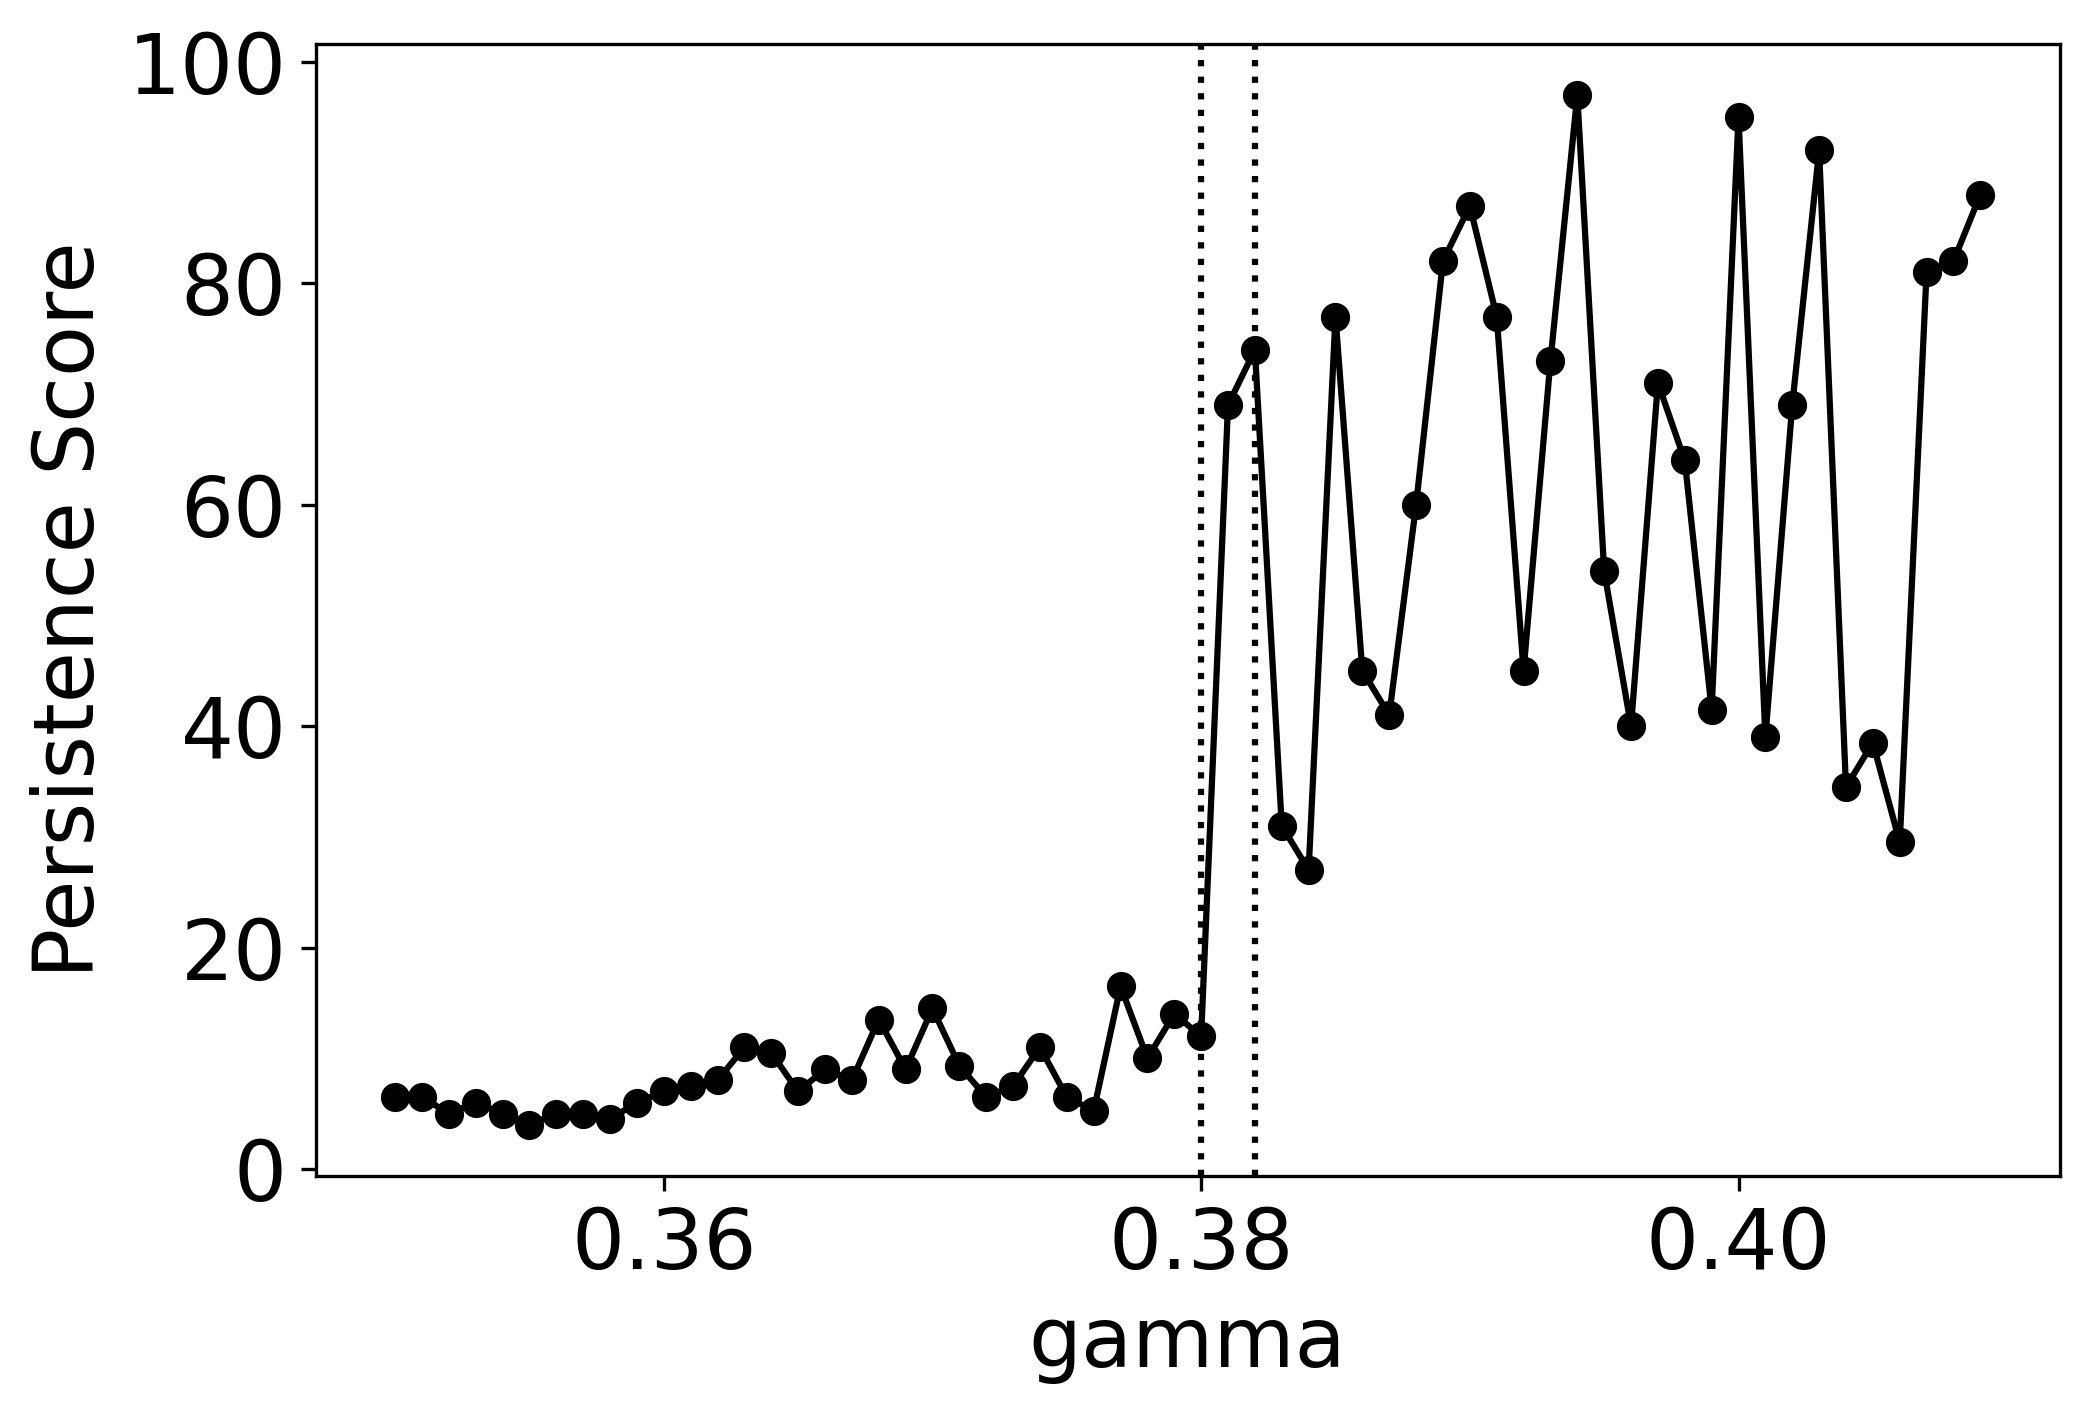

In [9]:
from matplotlib import pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(20,10))


mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(7.5,5),dpi=300)



plt.plot(gamma,Scr,linestyle='-', marker='o', color='k')
plt.ylabel('Persistence Score')
plt.xlabel('gamma')

plt.axvline(x = 0.38, color = 'k', linestyle = ':')
plt.axvline(x = 0.382, color = 'k', linestyle = ':')

#df.to_csv(f'result_600 gamma_Persistence score.csv')

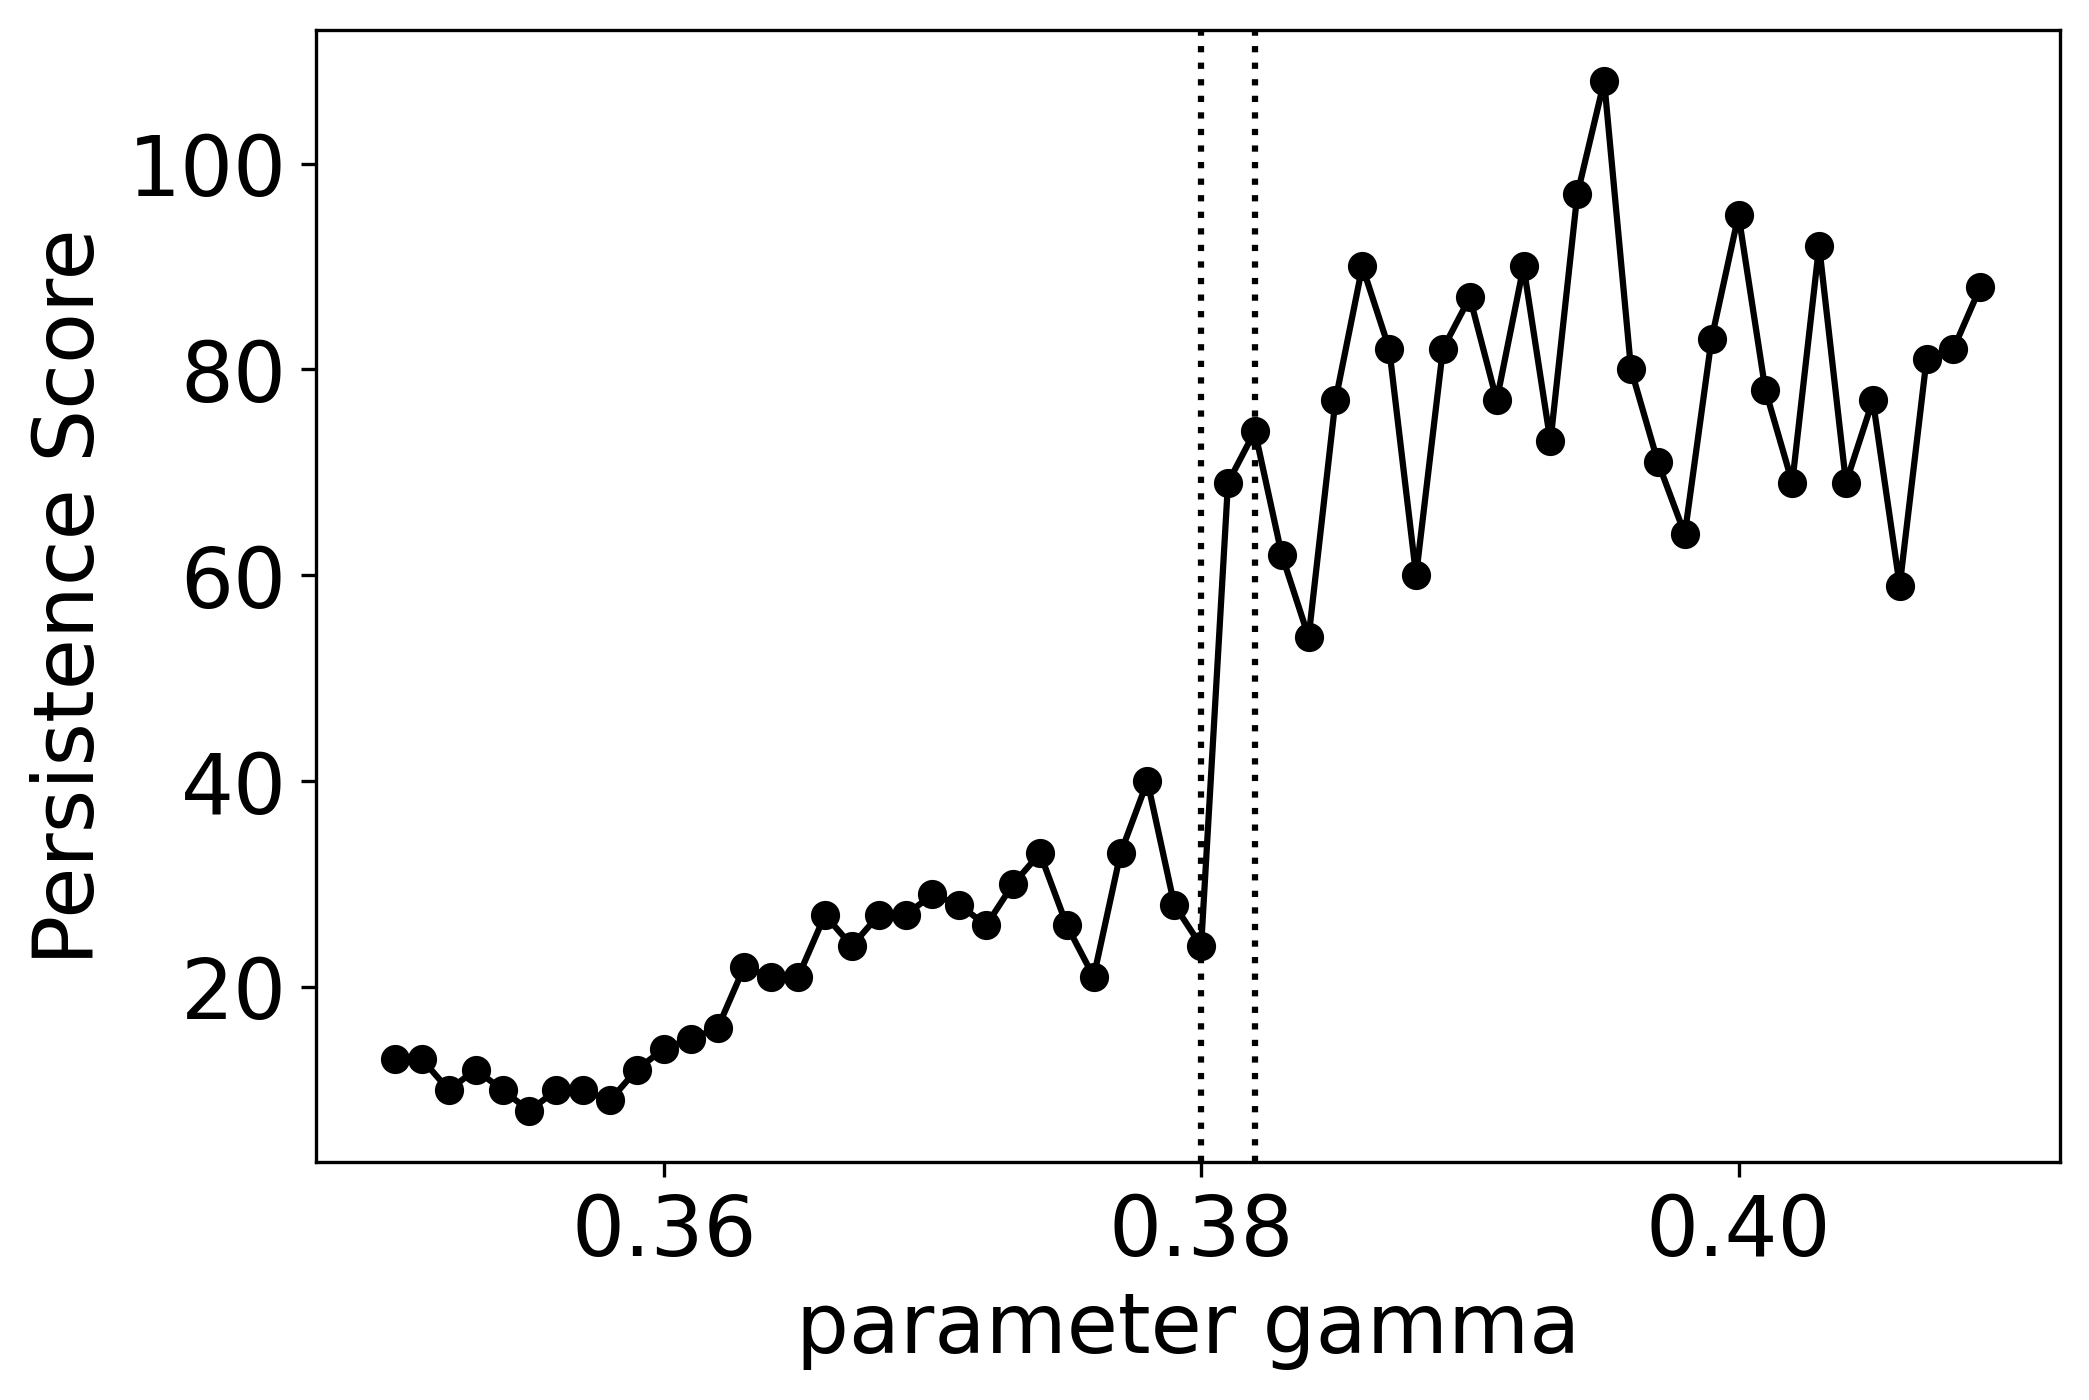

In [11]:
from matplotlib import pyplot as plt



mpl.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(7.5,5),dpi=300)


plt.plot(gamma,Noise_score,linestyle='-', marker='o', color='k')
plt.ylabel('Persistence Score')
plt.xlabel('parameter gamma')

plt.axvline(x = 0.38, color = 'k', linestyle = ':')
plt.axvline(x = 0.382, color = 'k', linestyle = ':')


dict = {'gamma': gamma, 'Noise score': Noise_score} 
      
df = pd.DataFrame(dict)

#print(df)

# saving the dataframe

#df.to_csv(f'result_600 gamma_noise score.csv')